In [ ]:
%matplotlib inline
import random
import torch
#from mxnet import autograd, np, npx
#from d2l import mxnet as d2l
import numpy as np
#npx.set_np()
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = torch.tensor(4.2)
features, labels = synthetic_data(true_w, true_b, 1000)
def data_iter(batch_size, features, labels):#feature是x, lable是y,一次取10个
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
w = torch.normal(0, 0.01, (2, 1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
def linreg(X, w, b): #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b
def squared_loss(y_hat, y): #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
def sgd(params, lr, batch_size): #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad 
            param.grad.zero_()
            
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.requires_grad_=True
        l.mean().backward()
        sgd([w, b], lr, batch_size) # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
print(w,b)


In [ ]:
import random
import torch 
epochs=3
w_true=torch.tensor([-2500,2.9])
b_true=torch.tensor(1.75)
x=torch.normal(4,3,(1000,2))
def line_reg(w,b,x):
    y=torch.matmul(x,w.reshape(-1,1))+b
    y+=torch.normal(0,0.01,y.shape)
    return y
y=line_reg(w_true,b_true,x)
w=torch.zeros_like(w_true,requires_grad=True)
b=torch.zeros_like(b_true,requires_grad=True)
batch_size=10
epochs=101
learnrate=0.003
def data_iterature(batch_size,input_x,input_y):#每次随机抽10个
    num_examples = len(input_x)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = indices[i:i + batch_size]  # 直接按 batch_size 切分
        yield input_x[batch_indices], input_y[batch_indices]  # 使用 yield 生成批次
print(data_iterature(batch_size,x,y))
def sgd(params,lr):
    with torch.no_grad():#参数更新时使用，以免引入不必要的计算
       for param in params:
            param -= lr * param.grad
            param.grad.zero_()
def loss(y1,y2):
    return (y1-y2)**2
for epoch in range(epochs):
    for input_x,input_y in data_iterature(batch_size,x,y):
        y_pred=torch.matmul(input_x,w.reshape(-1,1))+b
        l=loss(y_pred,input_y).mean()
        print(l)
        l.backward()
        sgd([w,b],learnrate)
    with torch.no_grad():
            train_l = loss(torch.matmul(w,x.reshape(2,1000))+b, y)
            print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
print([w,b])

In [ ]:
import numpy as np
import torch
from torch import nn
#from torch.utils import data
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features=torch.normal(0,1,(1000,2))
labels=torch.matmul(features,true_w.reshape(2,1))+true_b
#print(labels)
# labels=labels.squeeze()
# print(labels)
def load_array(data_arrays, batch_size): #@save
    """构造一个PyTorch数据迭代器"""
    dataset = torch.utils.data.TensorDataset(*data_arrays)
    return torch.utils.data.DataLoader(dataset, batch_size)
batch_size = 10
data_iter = load_array((features, labels), batch_size)
iterator=iter(data_iter)
# for batch in data_iter:
#     print(batch)
net=torch.nn.Sequential(torch.nn.Linear(2,1))
net[0].weight.data.normal_(0,0.1)
net[0].bias.data.fill_(0)
loss=nn.MSELoss()
trainer=torch.optim.SGD(net.parameters(),lr=0.01)
epochs=100

for epoch in range(epochs):
    for x,y in data_iter:
        trainer.zero_grad()
        l=loss(net(x),y)
        l.backward()
        trainer.step()
    with torch.no_grad():
        l=loss(net(features),labels)
        print(f'epoch {epoch + 1}, loss {l:f}')
print(net[0].weight,net[0].bias)

In [ ]:
import torch 
from torch.utils import data
from torch import nn
true_w=torch.tensor([3,-5,1.6])
true_b=torch.tensor(-4.1)
features=torch.normal(0,5,(1000,3))
labels=torch.matmul(features,true_w)+true_b
# features=(features_origin-features_origin.mean())/features_origin.std()
# labels=(labels_origin-labels_origin.mean())/labels_origin.std()
print(features[0])
print(labels[0])
def data_iter(batch_size,features,labels):
    iter=data.TensorDataset(*(features,labels))
    print(data.DataLoader(iter,batch_size))
    return data.DataLoader(iter,batch_size)
epoches=1000
loss=nn.SmoothL1Loss(beta=0.5)
batch_size=50
models=torch.nn.Sequential(torch.nn.Linear(3,1))
models[0].weight.data.normal_(0,3)
models[0].bias.data=torch.tensor(1.0)
trainer=torch.optim.SGD(models.parameters(),lr=0.01)
for epoch in range(epoches):
    for x,y in data_iter(batch_size,features,labels):
        trainer.zero_grad()
        l=loss(y,models(x).squeeze())
        l.backward()
        print(models[0].weight.grad,"权重\n")
        print(models[0].bias.grad,"偏置\n")
        trainer.step()
    with torch.no_grad():
        l=loss(labels,models(features).squeeze())
        print(f'epoch{epoch+1},{l:f}loss')
print(models[0].weight,models[0].bias)

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np
import torch
# def pi_half_formatter(val, pos):
#     # 计算 π 的半整数倍系数
#     coeff = val / (np.pi / 2)
#     coeff = int(round(coeff))
#     sign = '-' if coeff < 0 else ''  # 手动处理符号
#     # 如果系数是整数或者非常接近整数（考虑浮点数精度），则显示该整数倍的 π/2
#     if coeff % 2 == 0:
 
#         if coeff==0:
#             return '0'
#         elif abs(coeff) == 2:
#             return fr'${sign}\pi$'          # 显示 π 而不是 1π
#         else:
#             return fr'${sign}{abs(coeff)//2}\pi$' # 2π, 3π...
#     else:
#         if coeff == 1:
#             return fr'${sign}\frac{{\pi}}{{2}}$'  # π/2
#         else:
#             return fr'${sign}\frac{{{abs(coeff)}\pi}}{{2}}$'  # 3
def pi_half_formatter(val, pos):
    """ 将数值格式化为 π/2 的倍数 """
    unit = np.pi / 2
    coeff = val / unit  # 计算系数
    
    # 浮点精度处理：判断是否接近整数
    if not np.isclose(coeff, round(coeff), atol=1e-9):
        return ''  # 非整数倍时返回空字符串
    
    coeff = int(round(coeff))
    sign = '-' if coeff < 0 else ''  # 手动处理符号
    abs_coeff = abs(coeff)
    
    # 生成LaTeX标签
    if abs_coeff == 0:
        return r'$0$'
    elif abs_coeff % 2 == 0:
        multiple = abs_coeff // 2
        if multiple == 1:
            return fr'${sign}\pi$'
        else:
            return fr'${sign}{multiple}\pi$'
    else:
        if abs_coeff == 1:
            return fr'${sign}\frac{{\pi}}{{2}}$'
        else:
            return fr'${sign}\frac{{{abs_coeff}\pi}}{{2}}$'
f,ax=plt.subplots(1)
x = np.linspace(-3*np.pi, 3*np.pi, 100)
x1= torch.tensor(x, requires_grad=True)
y1= torch.sin(x1)
y1.backward(torch.ones_like(x1))
print(x1.grad.type())
ax.plot(x,np.sin(x),label='sin(x)')
ax.plot(x,x1.grad,label="gradient of sin(x)")
ax.legend(loc='lower right', shadow=False)

ax.xaxis.set_major_formatter(FuncFormatter(pi_half_formatter))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi/2))

plt.show()




In [4]:
import torchvision
import torch
import matplotlib.pyplot as plt
from torch.utils import data
from torchvision import transforms
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root=r"C:\Users\Lenovo\Desktop\visiondata", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root=r"C:\Users\Lenovo\Desktop\visiondata", train=False, transform=trans, download=True)
len(mnist_train), len(mnist_test)
type(mnist_train[1])#60000行，2列，第一列是图像ternsor 1,28,28，第二列是label(int)
def get_fashion_mnist_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
def show_images(imgs, num_rows, num_cols, titles=None, scale=1):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            #print(img.squeeze().numpy())
            ax.imshow(img.squeeze().numpy())
        else:
            # PIL图片
            ax.imshow(img)
        
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
        #ax.axis('off')
    return axes
# X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
# show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))


In [5]:
batch_size = 256
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=12)
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root=r"C:\Users\Lenovo\Desktop\visiondata", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root=r"C:\Users\Lenovo\Desktop\visiondata", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=12),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=12))
train_iter, test_iter = load_data_fashion_mnist(32)
# for X, y in train_iter:
#     print(X.shape, X.dtype, y.shape, y.dtype)
#     show_images(X, 2, 8, titles=get_fashion_mnist_labels(y))
#     break
    

In [6]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1,keepdim=True)
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y

    return (cmp.type(y.dtype).sum())
accuracy(y_hat, y) / len(y)
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            #print("Input shape:", X.shape,y.shape)
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]
evaluate_accuracy(net, test_iter)

0.083

KeyboardInterrupt: 

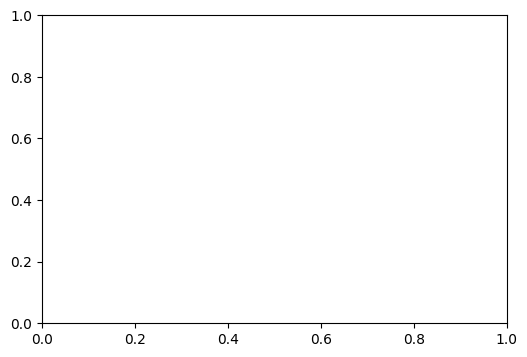

In [9]:
import torch.optim as optim
import matplotlib.pyplot as plt
from IPython import display
batch_size=256
class Animator:
    """动态绘制训练指标的实用类"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(6, 4)):
        """
        参数说明：
        - xlabel/ylabel: 坐标轴标签
        - legend: 图例列表
        - xlim/ylim: 坐标轴范围 (例如 (0, 10))
        - xscale/yscale: 坐标轴缩放类型 ('linear'/'log')
        - fmts: 线条样式列表 (对应不同指标)
        - figsize: 图像尺寸
        """
        # 初始化图形和坐标轴
        
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows*ncols == 1:
            self.axes = [self.axes]  # 统一处理单轴情况
        
        # 配置坐标轴参数
        self.config = {
            'xlabel': xlabel,
            'ylabel': ylabel,
            'legend': legend or [],
            'xlim': xlim,
            'ylim': ylim,
            'xscale': xscale,
            'yscale': yscale
        }
        
        # 数据存储结构
        self.X, self.Y = None, None
        self.fmts = fmts
        
        # 设置SVG清晰显示
        plt.rcParams['figure.figsize'] = figsize
        plt.rcParams['svg.fonttype'] = 'none'  # 确保SVG文本可编辑

    def _config_axes(self):
        """配置坐标轴属性"""
        ax = self.axes[0]
        if self.config['xlabel']:
            ax.set_xlabel(self.config['xlabel'])
        if self.config['ylabel']:
            ax.set_ylabel(self.config['ylabel'])
        if self.config['xlim']:
            ax.set_xlim(self.config['xlim'])
        if self.config['ylim']:
            ax.set_ylim(self.config['ylim'])
        ax.set_xscale(self.config['xscale'])
        ax.set_yscale(self.config['yscale'])
        if self.config['legend']:
            ax.legend(self.config['legend'])
        ax.grid(True)  # 添加网格线

    def add(self, x, y):
        """
        添加数据点：
        - x: 横坐标值（标量或列表）
        - y: 纵坐标值（标量或列表，对应不同指标）
        """
        # 数据标准化处理
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
            
        # 初始化数据存储
        if self.X is None:
            self.X = [[] for _ in range(n)]
        if self.Y is None:
            self.Y = [[] for _ in range(n)]
            
        # 存储数据点
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
                
        # 清空当前图形
        self.axes[0].cla()
        
        # 重绘所有线条
        for x_arr, y_arr, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x_arr, y_arr, fmt)
            
        # 应用坐标轴配置
        self._config_axes()
        
        # Jupyter动态显示
        display.display(self.fig)
        display.clear_output(wait=True)
        plt.close(self.fig)  # 防止重复显示静态图

def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)

        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        print(f"epoch:{epoch}",train_metrics[0],train_metrics[1])
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc
    
lr = 0.1
def updater(batch_size):
    return optim.SGD([W, b], lr, batch_size)
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)
